In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
cars_flag = False
if cars_flag:
    src = '../cars/car.data'
    import warnings
    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
else:
    src = '../adult/data.txt'
data = pd.read_csv(src, index_col=0)

In [4]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,61,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,Germany,>50K
1,37,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,15024,0,40,United-States,>50K
2,50,Private,1st-4th,2,Married-spouse-absent,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
3,38,Private,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States,>50K
4,56,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,Black,Female,0,0,38,United-States,<=50K


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [6]:
# Set data set specific settings for template

mappings = {}
cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country', 'class']
if cars_flag:
    scoring = metrics.make_scorer(metrics.matthews_corrcoef)    
    for i in data.columns:
        data[i]=le.fit_transform(data[i])
        mappings[i] = list(le.classes_)
else:
    scoring = 'accuracy'    
    for i in cols:
        data[i]=le.fit_transform(data[i])
        mappings[i] = list(le.classes_)

In [7]:
mappings

{'class': [' <=50K', ' >50K'],
 'education': [' 10th',
  ' 11th',
  ' 12th',
  ' 1st-4th',
  ' 5th-6th',
  ' 7th-8th',
  ' 9th',
  ' Assoc-acdm',
  ' Assoc-voc',
  ' Bachelors',
  ' Doctorate',
  ' HS-grad',
  ' Masters',
  ' Preschool',
  ' Prof-school',
  ' Some-college'],
 'marital-status': [' Divorced',
  ' Married-AF-spouse',
  ' Married-civ-spouse',
  ' Married-spouse-absent',
  ' Never-married',
  ' Separated',
  ' Widowed'],
 'native-country': [' ?',
  ' Cambodia',
  ' Canada',
  ' China',
  ' Columbia',
  ' Cuba',
  ' Dominican-Republic',
  ' Ecuador',
  ' El-Salvador',
  ' England',
  ' France',
  ' Germany',
  ' Greece',
  ' Guatemala',
  ' Haiti',
  ' Honduras',
  ' India',
  ' Iran',
  ' Ireland',
  ' Italy',
  ' Jamaica',
  ' Japan',
  ' Laos',
  ' Mexico',
  ' Nicaragua',
  ' Outlying-US(Guam-USVI-etc)',
  ' Peru',
  ' Philippines',
  ' Poland',
  ' Portugal',
  ' Puerto-Rico',
  ' Scotland',
  ' South',
  ' Taiwan',
  ' Thailand',
  ' Trinadad&Tobago',
  ' United-States

In [8]:
X = data.loc[:,data.columns != 'class']
y = data.iloc[:,-1]

In [9]:
print(X.shape)
print(y.shape)
X.head()

(3000, 13)
(3000,)


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,61,4,9,13,2,4,0,4,1,0,0,50,11
1,37,3,9,13,2,10,5,2,0,15024,0,40,36
2,50,3,3,2,3,3,4,4,1,0,0,40,36
3,38,3,11,9,2,13,0,4,1,0,0,50,36
4,56,3,11,9,6,1,4,2,0,0,0,38,36


In [10]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: class, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [51]:
base_estimator = DecisionTreeClassifier(max_depth=2)

In [52]:
clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=25)
clf

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=25, random_state=None)

In [59]:
param_grid = dict(n_estimators=[3,5,10,15,20,25,30,40,50,60])
grid = GridSearchCV(clf, 
                    param_grid=param_grid, 
                    scoring=scoring, 
                    cv=10, n_jobs=-1)

In [60]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=25, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [3, 5, 10, 15, 20, 25, 30, 40, 50, 60]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [61]:
clf = grid.best_estimator_
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.8175
{'n_estimators': 30}
AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=30, random_state=None)


In [62]:
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=10, scoring=scoring)
print(scoring)

accuracy


In [63]:
train_scores_mean = np.mean(train_scores,axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

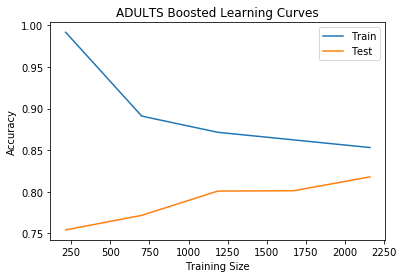

In [64]:
plt.title("ADULTS Boosted Learning Curves")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.plot(train_sizes, train_scores_mean, label="Train")
plt.plot(train_sizes, test_scores_mean, label="Test")
plt.legend(loc='best')

In [65]:
param_range = range(5,50,5)
train_scores, test_scores = validation_curve(clf, X_train, y_train, 
                                             param_name='n_estimators', 
                                             param_range=param_range,
                                             cv=10,
                                             scoring=scoring)

In [66]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

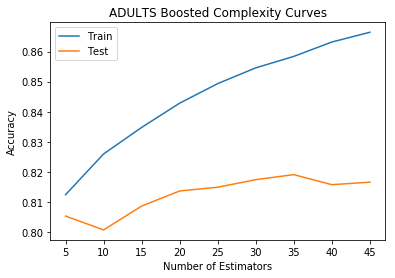

In [67]:
plt.title("ADULTS Boosted Complexity Curves")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.plot(param_range, train_scores_mean, label="Train")
plt.plot(param_range, test_scores_mean, label="Test")
plt.legend(loc='best')

In [77]:
clf = KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [78]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [79]:
y_pred = clf.predict(X_test)

In [80]:
print metrics.accuracy_score(y_test, y_pred)

0.785


In [68]:
clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=30)
clf

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=30, random_state=None)

In [69]:
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=30, random_state=None)

In [70]:
y_pred = clf.predict(X_test)

In [71]:
print metrics.accuracy_score(y_test, y_pred)

0.8116666666666666


In [72]:
clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=35)
clf

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=35, random_state=None)

In [73]:
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=35, random_state=None)

In [74]:
y_pred = clf.predict(X_test)

In [75]:
print metrics.accuracy_score(y_test, y_pred)

0.8016666666666666
